# SciPy Hypothesis Testing Exercises 

For each exercise, 
* describe the problem 
* describe the data
* explain how you know what type of hypothesis t-test to perform






## 1. Is the mean age of women who had a stroke greater than the mean age of the men who had a stroke? 
Use $\alpha = 0.05$

In [262]:
import pandas as pd
import utils
import importlib
importlib.reload(utils)
# pull the cleaned patient EDA from DA5 repository:

patient_data_df = pd.read_csv("../DA5/cleaned_patientEDA.csv")

# extract the mean age of women who had a stroke and mean age of men who had a stroke:
# average age for male stroke patients:
most_common_RIC = patient_data_df["RIC"].mode().iloc[0]
male_stroke_age = []
female_stroke_age = []
for i in range(len(patient_data_df["RIC"])):
    curr_patient = patient_data_df["RIC"].iloc[i]
    if most_common_RIC in curr_patient:
        if "M" in patient_data_df["Gender"].iloc[i]:
            male_stroke_age.append(patient_data_df["Age"].iloc[i])
        elif "F" in patient_data_df["Gender"].iloc[i]:
            female_stroke_age.append(patient_data_df["Age"].iloc[i])
male_stroke_age_ser = pd.Series(male_stroke_age)
n_men = len(male_stroke_age_ser)
stroke_age_male_avg = round(male_stroke_age_ser.mean(), 2)
print(stroke_age_male_avg)

# average age for female stroke patients:
female_stroke_age_ser = pd.Series(female_stroke_age)
n_women = len(female_stroke_age_ser)
stroke_age_female_avg = round(female_stroke_age_ser.mean(), 3)
print(stroke_age_female_avg)



70.08
72.605


### 5-step approach

1. Identify $H_{0}$ and $H_{1}$
* $H_{0} = \mu_{women} \leq \mu_{men}$
* $H_{1} = \mu_{women} > \mu_{men}$


2. Level of significance
* $\alpha = 0.05$ 

3. Select the appropriate statistic
* Since we are working with two unrelated groups, we will use an independent two-sample test
* `ttest_ind()`


* $ t = \frac{\overline{X_{1}} - \overline{X_{2}}}{\sqrt{s_{p}^2 (\frac{1}{n_{1}} + \frac{1}{n_{2}})}} $

4. Formulate the Decision Rule
* with $\alpha = 0.05$ and the degrees of freedom being 561, the t-critical value is roughly 1.965. This means:
* If t-computed is $> 1.965$, then the null hypothesis will be rejected
* If t-computed is $\leq 1.965$, then the null hypothesis cannot be rejected


In [263]:
# calculate the pooled variance:
import numpy as np 
from scipy import stats

# pooled_variance = ((n_women - 1)^2 + (n_men-1)^2) / (n_women + n_men - 2)
# print(pooled_variance)
n = len(female_stroke_age_ser) 
dof = n-1
print("degrees of freedeom:", dof)
# t_computed = (stroke_age_female_avg - stroke_age_male_avg) / (np.sqrt(pooled_variance * ((1/n_women) + (1/n_men))))
# print("t-computed manual:", t_computed)

t_comp, pval = stats.ttest_ind(female_stroke_age_ser, male_stroke_age_ser)
pval /= 2 # divide by 2 because there is only 1 rejection region 
print("t:", t_comp, "pval:", pval)
alpha = 0.05
if pval < alpha:
    print("reject null hyp")
else:
    print("do not reject null hyp")

degrees of freedeom: 561
t: 3.0212409378467506 pval: 0.0012861144659843757
reject null hyp


### Conclusion (Step 5):
* Sicne the t-computed is 3.02, which is greater than 1.965, the null hypothesis should be rejected. This means that the average age of female stroke patients was indeed higher than that of the male stroke patients. 

# 2. Determine the number of days that 222 students are active on Ed compared to 322 students 
Use $\alpha = 0.001$

In [264]:
# first, import the data into pandas dataframes

df_222 = pd.read_json("ed_222.json")
# print(df_222.head())

df_322 = pd.read_json("ed_322.json")
# print(df_322.head())

### Now, to perform the 5-step hypothesis test

1. Identify the hypotheses
* $H_{0} = \mu_{222} = \mu_{322}$  
no difference in the number of days that 222 students are active on Ed versus 322
* $H_{1} = \mu_{222} \neq \mu_{322}$  
students in 222 are not active on Ed the same amount as students in 322


2. Level of Significance
* $\alpha = 0.001$

3. Test Statistic 
* This is going to be a two-tailed test because we want to know if there is any difference whether that is more or less activity by one group over the other. Furthermore, this is an independent test because the two groups are not related. 
* $t = \frac{\overline{d} - \mu_{d}}{s_{\overline{d}}}$
* use `ttest_rel()`

4. Formulate Decision Rule
* With $\alpha = 0.001$, we need to know the degrees of freedom


In [265]:
# calculate the degrees of freedom to find t-critical:
dof = len(df_222) + len(df_322) - 2
print(dof)

92


4. continued...
* degrees of freedom = 31
* thus, our t-critical value is 3.633
* If t-computed $ > 3.633$ or $ < -3.633$, then we must reject the null hypothesis 
* If $-3.633 < t < 3.633$, then we do not reject the null hypothesis

In [266]:
# For step five, we will use Scipy to find t-computed:

t_comp, pval = stats.ttest_ind(df_222["Days Active"], df_322["Days Active"])
print("t:", t_comp, "pval:", pval)
alpha = 0.001
if pval < alpha:
    print("reject null hyp")
else:
    print("do not reject null hyp")

t: -5.487771363199516 pval: 3.5684494006989487e-07
reject null hyp


### Conclusion (step 5):
* based on the t-computed score, we must reject the null hypothesis because t-computed lies beyond the t-critical value. in other words, the 222 students (since the t-computed value is negative), were active for *less* days than the 322 students. 

# 3.  is the mean duration for students who took the quiz remotely greater than the mean duration for students who took the quiz in the classroom? 
Use a level of significance of 0.005

In [267]:
# import the data into a dataframe

df_quiz = pd.read_csv("IQ1_quiz_durations.csv")
print(df_quiz.head())

# separate the data into a series for the students who took the quiz remotely and a series for those who took it in-person
in_person_time = []
remote_time = []

df_quiz["In-person"] = df_quiz["In-person"].astype('string')
for i in range(len(df_quiz)):
    curr_student = df_quiz["In-person"].iloc[i]
    if "0" in curr_student:
        remote_time.append(df_quiz["Hours Start to Finish"].iloc[i])
    elif "1" in curr_student:
        in_person_time.append(df_quiz["Hours Start to Finish"].iloc[i])
# print(in_person_time, remote_time)

ipt = pd.Series(in_person_time)
rt = pd.Series(remote_time)

x_bar_ipt = ipt.mean()
x_bar_rt = rt.mean()
print(x_bar_ipt, x_bar_rt)

print("degrees of freedom:", (len(ipt) + len(rt) - 2))

   In-person  Hours Start to Finish
0          0                   0.14
1          0                   0.10
2          0                   0.13
3          0                   0.10
4          0                   0.16
0.09478260869565218 0.12333333333333335
degrees of freedom: 92


## Now that we have some data to work with, let's perform the 5-steps:

1. Hypotheses
* $H_{0} = \mu_{remote} \leq \mu_{in-person}$  
The remote students took, on average, the same amount or less time to complete IQ1.
* $H_{1} = \mu_{remote} > \mu{in-person}$  
The remote students took, on average, more time to complete IQ1.

2. Level of Significance
$ \alpha = 0.005$ 

3. Test Statistic
* we are working with two samples and they are independent of one another, thus we will be using the following formula for t-computed
*  $ t = \frac{\overline{X_{1}} - \overline{X_{2}}}{\sqrt{s_{p}^2 (\frac{1}{n_{1}} + \frac{1}{n_{2}})}} $

4. Decision Rule:
* t-critical = $\frac{2.871}{2}  
we divide by two because this is a one-tailed test

In [268]:
# Now we will use SciPy to find t-computed:

t_comp, pval = stats.ttest_ind(rt, ipt)
pval /= 2 # divide by 2 because there is only 1 rejection region 
print("t:", t_comp, "pval:", pval)
alpha = 0.005
if pval < alpha:
    print("reject null hyp")
else:
    print("do not reject null hyp")

t: 4.12720417112991 pval: 4.029306042293943e-05
reject null hyp


### Conclusion (step 5):
Since our t-computed is 4.127 and that is outside the scope of non-rejection range, we must reject the null hypothesis. In other words, the remote students did indeed take a longer time, on average, to complete IQ1. 

# 4. Did the subjects perform the trial faster after one week of pysical therapy?
Use $\alpha = 0.01$

In [269]:
# import the data and prepare it for statistical analysis!

df_trials = pd.read_csv("circuit_trials.csv")

before = []
after = []
for i in range(len(df_trials)):
    curr_patient = df_trials["Trial ID"].iloc[i]
    if "A" in curr_patient:
        before.append(df_trials["Duration"].iloc[i])
    elif "B" in curr_patient:
        after.append(df_trials["Duration"].iloc[i])

A_ser = pd.Series(before)
B_ser = pd.Series(after)

x_bar_A = A_ser.mean()
x_bar_b = B_ser.mean()

dof = len(A_ser) - 1
print("degrees of freedom:", dof, x_bar_A, x_bar_b)

degrees of freedom: 26 164.77485593962967 122.18973897185187


Now that we have done some preliminary preparation of the data, it is time to perform the 5-step hypothesis test

1. identify null and alternative hypotheses
* $H_{0} = \mu_{B} \geq \mu_{A}$  
The average duration of the patients after PT was greater than or equal to the average duration before.
* $H_{1} = \mu_{B} < \mu{A}$  
The average duration of the pateitns after PT was less than that before PT.

2. Level of Significance 
*  $\alpha = 0.01$

3. Select Appropriate test statistic
* Since we are working with one-tailed data and two dependent samples, 
* $t = \frac{\overline{d} - \mu_{d}}{s_{\overline{d}}}$


4. Decision Rules
* we will use $\alpha = 0.01$ and degrees of freedom = 26 to find t-critical:
* t-critical = 2.479
* If t-computed $\geq 2.479$, then do not reject null hypothesis 
* If t-compued $< 2.479$, then reject null hypothesis

In [270]:
# Now we can use SciPy to calculate t-computed:

t_comp, pval = stats.ttest_rel(B_ser, A_ser)
pval /= 2 # divide by 2 because there is only 1 rejection region 
print("t:", t_comp, "pval:", pval)
alpha = 0.01
if pval < alpha:
    print("reject null hyp")
else:
    print("do not reject null hyp")

t: -3.336688368513952 pval: 0.0012809826011843611
reject null hyp


### Conclusion (step 5):
Based on the calculations made using SciPy, our t-computed is beyond the scope of non-rejection, thus we can conclude that the physical therapy did in fact improve(lessen) the average duration of time taken to perform the activity by patients. 

# 5. Working with GU website traffic data 

In [271]:
# First and foremost we must import the data! 

web_df = pd.read_csv("GU_website.csv")
print(web_df.head())

print("MAXIMUMS:\n", web_df.max())
print("MINIMUMS:\n", web_df.min())

         Day      Date  New Visitor  Returning Visitor
0     Monday  1/1/2018            9                 36
1    Tuesday  1/2/2018           48                217
2  Wednesday  1/3/2018         6008               3094
3   Thursday  1/4/2018         6202               3455
4     Friday  1/5/2018         4619               3190
MAXIMUMS:
 Day                  Wednesday
Date                  9/9/2021
New Visitor             117050
Returning Visitor        14730
dtype: object
MINIMUMS:
 Day                    Friday
Date                 1/1/2018
New Visitor                 2
Returning Visitor          36
dtype: object


In [272]:
x_bar_returns = web_df["Returning Visitor"].mean()
x_bar_new = web_df["New Visitor"].mean()
print("returns:", x_bar_returns,"new:", x_bar_new)

returns: 4846.866493843163 new: 4727.9384316267015


## Analyze by day of the week

<AxesSubplot:xlabel='0'>

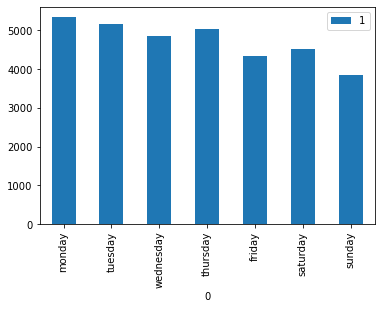

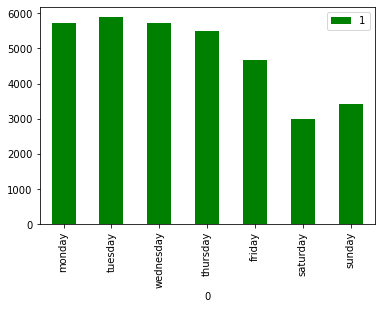

In [273]:
grouped_by_day = web_df.groupby('Day')

# Split & Apply
mon_new, mon_return = utils.get_series(grouped_by_day, 'Monday')
tues_new, tues_return = utils.get_series(grouped_by_day, 'Tuesday')
wed_new, wed_return = utils.get_series(grouped_by_day, 'Wednesday')
thur_new, thur_return = utils.get_series(grouped_by_day, 'Thursday')
fri_new, fri_return = utils.get_series(grouped_by_day, 'Friday')
sat_new, sat_return = utils.get_series(grouped_by_day, 'Saturday')
sun_new, sun_return = utils.get_series(grouped_by_day, 'Sunday')

# Combine
new_daily_df = pd.DataFrame([['monday', mon_new],
                             ['tuesday', tues_new],
                             ['wednesday', wed_new],
                             ['thursday', thur_new],
                             ['friday', fri_new],
                             ['saturday', sat_new],
                             ['sunday', sun_new]])

return_daily_df = pd.DataFrame([['monday', mon_return],
                             ['tuesday', tues_return],
                             ['wednesday', wed_return],
                             ['thursday', thur_return],
                             ['friday', fri_return],
                             ['saturday', sat_return],
                             ['sunday', sun_return]])
                            
# visualize

new_daily_df.plot.bar(x=0, y=1)

return_daily_df.plot.bar(x=0, y=1, color='green')



## Analyze by month of year

In [274]:
# need to figure out how to group data by month 
add_month_df = utils.get_month(web_df)
add_month_df.rename(columns= {'Date' : 'Month'}, inplace=True)
grouped_by_month = add_month_df.groupby('Month')
grouped_by_month.head()

# Split 
# jan = 
# feb = 
# march = 
# april = 
# may = 
# june = 
# july = 
# aug = 
# sept = 
# octo = 
# nov = 
# dec = 


c:\Users\jskye\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Day,Month,New Visitor,Returning Visitor
0,Monday,january,9,36
1,Tuesday,january,48,217
2,Wednesday,january,6008,3094
3,Thursday,january,6202,3455
4,Friday,january,4619,3190
31,Thursday,february,4963,6221
32,Friday,february,3700,4537
33,Saturday,february,3678,2624
34,Sunday,february,2690,2970
35,Monday,february,4453,6221
